# Sentiment analysis on the Amazon review dataset, using support vector classifier

We begin by importing the various libraries and functions we will need.

In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import timeit

from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

Note that we are importing a previously processed csv file.

In [3]:
# Importing data start timer
print('Importing data')
start = timeit.default_timer()

data_train = pd.read_csv('data/amazon_clean_train.csv', encoding='utf-8')
data_test = pd.read_csv('data/amazon_clean_test.csv', encoding='utf-8')

# Importing data stop timer
stop = timeit.default_timer()
print('Time: ', stop - start)

data_train.Label.value_counts()
data_test.Label.value_counts()

Importing data
Time:  13.441509100000001


1    200000
0    200000
Name: Label, dtype: int64

We now need to vectorize our data. Here we need to explain some aspects of what we are doing. 

The TfidfVectorizer was used both to prepare the strings, but also to strip away some useless data (that caused clutter in the dataset). The exact values were found through a bit of trial and error.

The reason we use apply(lambda x: np.str_(x)) is that we had occasional problems where, in spite of our efforts, we found that sometimes a line in the dataset was not recognised as a string. We found that the apply lambda function was a quick and easy way to get around this problem.

In [4]:
#tf_idf_cv = TfidfVectorizer()
tf_idf_cv = TfidfVectorizer(min_df = 25, max_df = 0.8,
                    max_features = None, sublinear_tf = True, use_idf = True)


# Fitting vectors start timer
print('Fitting vectors')
start = timeit.default_timer()
trainX = tf_idf_cv.fit_transform(data_train['Review']
                                 .apply(lambda x: np.str_(x)))
testX = tf_idf_cv.transform(data_test['Review']
                            .apply(lambda x: np.str_(x)))
testY = data_test['Label'].values.astype(int)
trainY = data_train['Label'].values.astype(int)
# Fitting vectors stop timer
stop = timeit.default_timer()
print('Time: ', stop - start)

Fitting vectors
Time:  188.62563799999998


# Initial test run of various kernels of SVC

Note that in this section we are trying to find the best kernel. The problem is that SVC is so demanding on CPUs and memories that we are unable to test on the full dataset. Instead we use bagging, extracting a much smaller sample (25K and 100K) of the full dataset and testing on that.

Even with this you can see that the results were quite one sided. Simply put only the Linear Kernel had any success whatsoever and all the others classified every single item as being in the same class.

## Linear Kernel

### 25K sample

In [18]:
## Gamma-function = "auto", kernel = "linear"
# Start timer
print('Bagging SVC with gamma = "auto", kernel = "linear"')
start = timeit.default_timer()

svc_linear = BaggingClassifier(base_estimator=SVC(cache_size=2000,
                kernel="linear", gamma = "auto"), n_jobs=1, verbose=2,
                n_estimators=1, random_state=0, max_samples=(25*(10**3)),
                ).fit(trainX, trainY)
# stop timer
stop = timeit.default_timer()
print('Training time: ', stop - start)
# Start timer
start = timeit.default_timer()
y_pred = svc_linear.predict(testX)
# stop timer
stop = timeit.default_timer()
print('Test time: ', stop - start)
#Performance Measures
accuracy_svclin = 100*accuracy_score(testY,y_pred)
precision_svclin = 100*precision_score(testY,y_pred)
f1_svclin = 100*f1_score(testY,y_pred)
# Printing results
print("Out of", len(testY), 'datapoints')
print("Accuracy: {:.04f}%".format(accuracy_svclin))
print("Precision: {:.04f}%".format(precision_svclin))
print("F1 score: {:.04f}%".format(f1_svclin))
m = confusion_matrix(y_true=testY, y_pred=y_pred)
print("Confusion Matrix: \n",m)

Bagging SVC with gamma = "auto", kernel = "linear"


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 1 for this parallel run (total 1)...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.9min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Training time:  174.78427789999841


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 30.2min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 30.2min finished


Test time:  1810.9115792999946
Out of 400000 datapoints
Accuracy: 86.4857%
Precision: 86.1677%
F1 score: 86.5449%
Confusion Matrix: 
 [[172092  27908]
 [ 26149 173851]]


In [22]:
y_perf_svclin = np.array(["Accuracy","Precision","F1"])
ypos = np.arange(len(y_perf_svclin))
y_val_svclin = np.array([accuracy_svclin,precision_svclin,f1_svclin])

<BarContainer object of 3 artists>

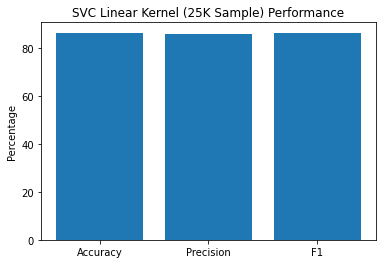

In [23]:
plt.xticks(ypos,y_perf_svclin)
plt.ylabel("Percentage")
plt.title("SVC Linear Kernel (25K Sample) Performance")
plt.bar(ypos,y_val_svclin)

## RBF Kernel

### 25K Sample

In [10]:
## Gamma-function = "auto", kernel = "rbf"
# Start timer
print('Bagging SVC with gamma = "auto", kernel = "rbf"')
start = timeit.default_timer()

svc_rbf = BaggingClassifier(base_estimator=SVC(cache_size=2000,
                kernel="rbf", gamma = "auto"), n_jobs=1, verbose=2,
                n_estimators=1, random_state=0, max_samples=(25*(10**3))
                ).fit(trainX, trainY)
# stop timer
stop = timeit.default_timer()
print('Training time: ', stop - start)
# Start timer
start = timeit.default_timer()
y_pred = svc_rbf.predict(testX)
# stop timer
stop = timeit.default_timer()
print('Test time: ', stop - start)
#Performance Measures
accuracy_svcrbf = 100*accuracy_score(testY,y_pred)
precision_svcrbf = 100*precision_score(testY,y_pred)
f1_svcrbf = 100*f1_score(testY,y_pred)
# Printing results
print("Out of", len(testY), 'datapoints')
print("Accuracy: {:.04f}%".format(accuracy_svcrbf))
print("Precision: {:.04f}%".format(precision_svcrbf))
print("F1 score: {:.04f}%".format(f1_svcrbf))
m = confusion_matrix(y_true=testY, y_pred=y_pred)
print("Confusion Matrix: \n",m)

Bagging SVC with gamma = "auto", kernel = "rbf"


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 1 for this parallel run (total 1)...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  5.6min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  5.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Training time:  335.9340523000001


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 66.8min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 66.8min finished


Test time:  4010.2019317000004


C:\Users\einst\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Out of 400000 datapoints
Accuracy: 50.0000%
Precision: 0.0000%
F1 score: 0.0000%
Confusion Matrix: 
 [[200000      0]
 [200000      0]]


In [21]:
y_perf_svcrbf = np.array(["Accuracy","Precision","F1"])
ypos = np.arange(len(y_perf_svcrbf))
y_val_svcrbf = np.array([accuracy_svcrbf,precision_svcrbf,f1_svcrbf])

<BarContainer object of 3 artists>

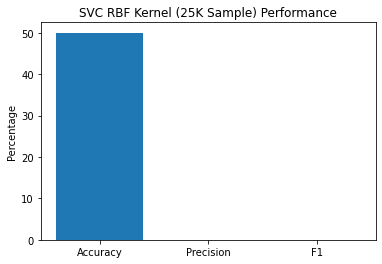

In [12]:
plt.xticks(ypos,y_perf_svcrbf)
plt.ylabel("Percentage")
plt.title("SVC RBF Kernel (25K Sample) Performance")
plt.bar(ypos,y_val_svcrbf)

### 100K Sample

In [8]:
## Gamma-function = "auto", kernel = "rbf"
# Start timer
print('Bagging SVC with gamma = "auto", kernel = "rbf"')
start = timeit.default_timer()

svc_rbf = BaggingClassifier(base_estimator=SVC(cache_size=2000,
                kernel="rbf", gamma = "auto"), n_jobs=1, verbose=2,
                n_estimators=1, random_state=0, max_samples=(100*(10**3))
                ).fit(trainX, trainY)
# stop timer
stop = timeit.default_timer()
print('Training time: ', stop - start)
# Start timer
start = timeit.default_timer()
y_pred = svc_rbf.predict(testX)
# stop timer
stop = timeit.default_timer()
print('Test time: ', stop - start)
# Printing results
print("Out of", len(testY), 'datapoints, our accuracy was {:.03f}%.'
      .format(100*(1-(y_pred != testY).sum()/len(testY))))
m = confusion_matrix(y_true=testY, y_pred=y_pred)
print(m)

Bagging SVC with gamma = "auto", kernel = "rbf"


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 1 for this parallel run (total 1)...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 94.2min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 94.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Training time:  5652.3200775410005


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 208.8min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 208.8min finished


Test time:  12528.255397921006
Out of 400000 datapoints, our accuracy was 50.000%.
[[200000      0]
 [200000      0]]


## Sigmoid Kernel

### 25K Sample

In [5]:
## Gamma-function = "auto", kernel = "sigmoid"
# Start timer
print('Bagging SVC with gamma = "auto", kernel = "sigmoid"')
start = timeit.default_timer()

svc_sigmoid = BaggingClassifier(base_estimator=SVC(cache_size=2000,
                kernel="sigmoid", gamma = "auto"), n_jobs=1, verbose=2,
                n_estimators=1, random_state=0, max_samples=(25*(10**3))
                ).fit(trainX, trainY)
# stop timer
stop = timeit.default_timer()
print('Training time: ', stop - start)
# Start timer
start = timeit.default_timer()
y_pred = svc_sigmoid.predict(testX)
# stop timer
stop = timeit.default_timer()
print('Test time: ', stop - start)
#Performance Measures
accuracy_svcsig = 100*accuracy_score(testY,y_pred)
precision_svcsig = 100*precision_score(testY,y_pred)
f1_svcsig = 100*f1_score(testY,y_pred)
# Printing results
print("Out of", len(testY), 'datapoints')
print("Accuracy: {:.04f}%".format(accuracy_svcsig))
print("Precision: {:.04f}%".format(precision_svcsig))
print("F1 score: {:.04f}%".format(f1_svcsig))
m = confusion_matrix(y_true=testY, y_pred=y_pred)
print("Confusion Matrix: \n",m)

Bagging SVC with gamma = "auto", kernel = "sigmoid"


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 1 for this parallel run (total 1)...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  5.9min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  5.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Training time:  354.13868490000004


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 69.2min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 69.2min finished


Test time:  4152.2326643


C:\Users\einst\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Out of 400000 datapoints
Accuracy: 50.0000%
Precision: 0.0000%
F1 score: 0.0000%
Confusion Matrix: 
 [[200000      0]
 [200000      0]]


In [6]:
y_perf_svcsig = np.array(["Accuracy","Precision","F1"])
ypos = np.arange(len(y_perf_svcsig))
y_val_svcsig = np.array([accuracy_svcsig,precision_svcsig,f1_svcsig])

<BarContainer object of 3 artists>

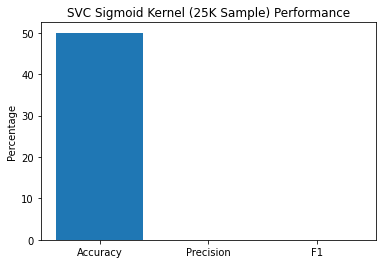

In [7]:
plt.xticks(ypos,y_perf_svcsig)
plt.ylabel("Percentage")
plt.title("SVC Sigmoid Kernel (25K Sample) Performance")
plt.bar(ypos,y_val_svcsig)

### 100K Sample

In [9]:
## Gamma-function = "auto", kernel = "sigmoid"
# Start timer
print('Bagging SVC with gamma = "auto", kernel = "sigmoid"')
start = timeit.default_timer()

svc_sigmoid = BaggingClassifier(base_estimator=SVC(cache_size=2000,
                kernel="sigmoid", gamma = "auto"), n_jobs=1, verbose=2,
                n_estimators=1, random_state=0, max_samples=(100*(10**3))
                ).fit(trainX, trainY)
# stop timer
stop = timeit.default_timer()
print('Training time: ', stop - start)
# Start timer
start = timeit.default_timer()
y_pred = svc_sigmoid.predict(testX)
# stop timer
stop = timeit.default_timer()
print('Test time: ', stop - start)
# Printing results
print("Out of", len(testY), 'datapoints, our accuracy was {:.03f}%.'
      .format(100*(1-(y_pred != testY).sum()/len(testY))))
m = confusion_matrix(y_true=testY, y_pred=y_pred)
print(m)

Bagging SVC with gamma = "auto", kernel = "sigmoid"


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 1 for this parallel run (total 1)...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 68.1min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 68.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Training time:  4088.1295474720027


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 211.2min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 211.2min finished


Test time:  12672.685062988
Out of 400000 datapoints, our accuracy was 50.000%.
[[200000      0]
 [200000      0]]


## Poly Kernel

### 25K Sample

In [7]:
## Gamma-function = "auto", kernel = "poly"
# Start timer
for p in np.arange(1,6):
    temp = 'Bagging SVC with gamma = "auto", kernel = "poly", degree=' + str(p)
    print(temp)
    start = timeit.default_timer()

    svc_poly = BaggingClassifier(base_estimator=SVC(cache_size=2000,
                    degree=int(p), kernel="poly", gamma = "auto"), n_jobs=1,
                    verbose=2, n_estimators=1, random_state=0,
                    max_samples=(25*(10**3))).fit(trainX, trainY)
    # stop timer
    stop = timeit.default_timer()
    print('Training time: ', stop - start)
    # Start timer
    start = timeit.default_timer()
    y_pred = svc_poly.predict(testX)
    # stop timer
    stop = timeit.default_timer()
    print('Test time: ', stop - start)
    # Printing results
    print("Out of", len(testY), 'datapoints, our accuracy was {:.03f}%.'
          .format(100*(1-(y_pred != testY).sum()/len(testY))))
    m = confusion_matrix(y_true=testY, y_pred=y_pred)
    print(m)

Bagging SVC with gamma = "auto", kernel = "poly", degree=1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 1 for this parallel run (total 1)...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  4.9min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  4.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Training time:  293.05734295


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 56.6min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 56.6min finished


Test time:  3397.5018631479998
Out of 400000 datapoints, our accuracy was 50.000%.
[[200000      0]
 [200000      0]]
Bagging SVC with gamma = "auto", kernel = "poly", degree=2


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 1 for this parallel run (total 1)...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  5.2min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  5.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Training time:  311.0976120840005


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 72.1min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 72.1min finished


Test time:  4327.162391235999
Out of 400000 datapoints, our accuracy was 50.000%.
[[200000      0]
 [200000      0]]
Bagging SVC with gamma = "auto", kernel = "poly", degree=3


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 1 for this parallel run (total 1)...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  6.8min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  6.8min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Training time:  410.1189300549995


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 72.1min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 72.2min finished


Test time:  4329.171723227002
Out of 400000 datapoints, our accuracy was 50.000%.
[[200000      0]
 [200000      0]]
Bagging SVC with gamma = "auto", kernel = "poly", degree=4


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 1 for this parallel run (total 1)...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  6.8min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  6.8min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Training time:  406.07982925000033


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 71.6min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 71.6min finished


Test time:  4295.963261613
Out of 400000 datapoints, our accuracy was 50.000%.
[[200000      0]
 [200000      0]]
Bagging SVC with gamma = "auto", kernel = "poly", degree=5


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 1 for this parallel run (total 1)...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  6.7min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  6.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Training time:  403.011740078


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 71.4min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 71.4min finished


Test time:  4285.003897259001
Out of 400000 datapoints, our accuracy was 50.000%.
[[200000      0]
 [200000      0]]


In [11]:
p=1
temp = 'Bagging SVC with gamma = "auto", kernel = "poly", degree=' + str(p)
print(temp)
start = timeit.default_timer()
svc_poly = BaggingClassifier(base_estimator=SVC(cache_size=2000,
                    degree=int(p), kernel="poly", gamma = "auto"), n_jobs=1,
                    verbose=2, n_estimators=1, random_state=0,
                    max_samples=(25*(10**3))).fit(trainX, trainY)
# stop timer
stop = timeit.default_timer()
print('Training time: ', stop - start)
# Start timer
start = timeit.default_timer()
y_pred = svc_poly.predict(testX)
# stop timer
stop = timeit.default_timer()
print('Test time: ', stop - start)
#Performance Measures
accuracy_svcpoly = 100*accuracy_score(testY,y_pred)
precision_svcpoly = 100*precision_score(testY,y_pred)
f1_svcpoly = 100*f1_score(testY,y_pred)
# Printing results
print("Out of", len(testY), 'datapoints')
print("Accuracy: {:.04f}%".format(accuracy_svcsig))
print("Precision: {:.04f}%".format(precision_svcsig))
print("F1 score: {:.04f}%".format(f1_svcsig))
m = confusion_matrix(y_true=testY, y_pred=y_pred)
print("Confusion Matrix: \n",m)

Bagging SVC with gamma = "auto", kernel = "poly", degree=1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 1 for this parallel run (total 1)...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  5.8min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  5.8min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Training time:  351.35098840000137


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 66.5min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 66.5min finished


Test time:  3989.217309599997


C:\Users\einst\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Out of 400000 datapoints
Accuracy: 50.0000%
Precision: 0.0000%
F1 score: 0.0000%
Confusion Matrix: 
 [[200000      0]
 [200000      0]]


In [15]:
y_perf_svcpoly = np.array(["Accuracy","Precision","F1"])
ypos = np.arange(len(y_perf_svcpoly))
y_val_svcpoly = np.array([accuracy_svcpoly,precision_svcpoly,f1_svcpoly])

<BarContainer object of 3 artists>

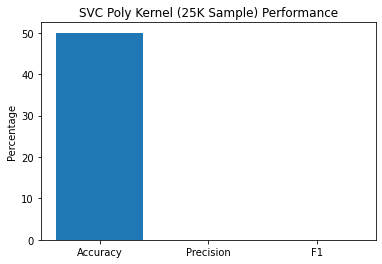

In [16]:
plt.xticks(ypos,y_perf_svcpoly)
plt.ylabel("Percentage")
plt.title("SVC Poly Kernel (25K Sample) Performance")
plt.bar(ypos,y_val_svcpoly)

In [25]:
y_accu_svc = np.array(["Linear","RBF","Sigmoid","Poly"])
y_f1_svc = np.array(["Linear","RBF","Sigmoid","Poly"])
ypos = np.arange(len(y_accu_svc))
y_val_accusvc = np.array([accuracy_svclin,accuracy_svcrbf,accuracy_svcsig,accuracy_svcpoly])
y_val_f1svc = np.array([f1_svclin,f1_svcrbf,f1_svcsig,f1_svcpoly])

<BarContainer object of 4 artists>

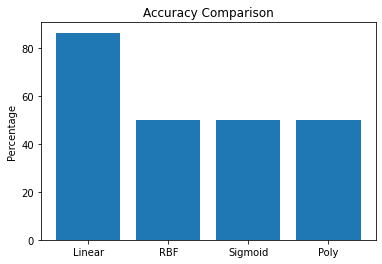

In [27]:
plt.xticks(ypos,y_accu_svc)
plt.ylabel("Percentage")
plt.title("Accuracy Comparison")
plt.bar(ypos,y_val_accusvc)

<BarContainer object of 4 artists>

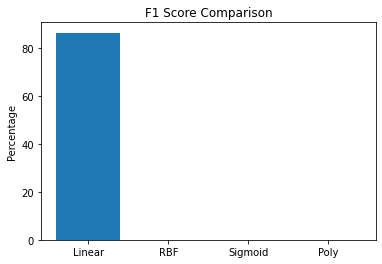

In [28]:
plt.xticks(ypos,y_f1_svc)
plt.ylabel("Percentage")
plt.title("F1 Score Comparison")
plt.bar(ypos,y_val_f1svc)

### 100K Sample

In [ ]:
## Gamma-function = "auto", kernel = "poly"
# Start timer

temp = 'Bagging SVC with gamma = "auto", kernel = "poly", degree=3'
print(temp)
start = timeit.default_timer()

svc_poly = BaggingClassifier(base_estimator=SVC(cache_size=2000,
                degree=int(3), kernel="poly", gamma = "auto"), n_jobs=1,
                verbose=2, n_estimators=1, random_state=0,
                max_samples=(100*(10**3))).fit(trainX, trainY)
# stop timer
stop = timeit.default_timer()
print('Training time: ', stop - start)
# Start timer
start = timeit.default_timer()
y_pred = svc_poly.predict(testX)
# stop timer
stop = timeit.default_timer()
print('Test time: ', stop - start)
# Printing results
print("Out of", len(testY), 'datapoints, our accuracy was {:.03f}%.'
      .format(100*(1-(y_pred != testY).sum()/len(testY))))
m = confusion_matrix(y_true=testY, y_pred=y_pred)
print(m)

Bagging SVC with gamma = "auto", kernel = "poly", degree=3


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 1 for this parallel run (total 1)...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 74.0min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 74.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Training time:  4442.483826783


# Developing the best model (Linear Kernel)

Having discovered that the linear kernel is the best for this (and thus also that we should use LinearSVC for any further work along these lines) we now attempt to run three versions of this to see if any of them reach an acceptable end.

## Bagging SVC, linear kernel, 12 runs with 25K samples

In [5]:
## Gamma-function = "auto", kernel = "linear"
# Start timer
print('Bagging SVC with gamma = "auto", kernel = "linear"')
start = timeit.default_timer()

svc_linear = BaggingClassifier(base_estimator=SVC(cache_size=1250,
                kernel="linear", gamma = "auto"), n_jobs=3, verbose=2,
                n_estimators=12, random_state=0, max_samples=(25*(10**3)),
                ).fit(trainX, trainY)
# stop timer
stop = timeit.default_timer()
print('Training time: ', stop - start)
# Start timer
start = timeit.default_timer()
y_pred = svc_linear.predict(testX)
# stop timer
stop = timeit.default_timer()
print('Test time: ', stop - start)
#Performance Measures
accuracy_svclin12_25k = 100*accuracy_score(testY,y_pred)
precision_svclin12_25k = 100*precision_score(testY,y_pred)
f1_svclin12_25k = 100*f1_score(testY,y_pred)
# Printing results
print("Out of", len(testY), 'datapoints')
print("Accuracy: {:.04f}%".format(accuracy_svclin12_25k))
print("Precision: {:.04f}%".format(precision_svclin12_25k))
print("F1 score: {:.04f}%".format(f1_svclin12_25k))
m = confusion_matrix(y_true=testY, y_pred=y_pred)
print("Confusion Matrix: \n",m)

Bagging SVC with gamma = "auto", kernel = "linear"


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed: 10.1min finished


Training time:  608.4086196360004


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed: 99.4min finished


Test time:  5966.043314516999
Out of 400000 datapoints, our accuracy was 88.084%.
[[177120  22880]
 [ 24785 175215]]


## Bagging SVC, linear kernel, 1 run with 100K samples

In [6]:
## Gamma-function = "auto", kernel = "linear"
# Start timer
print('Bagging SVC with gamma = "auto", kernel = "linear"')
start = timeit.default_timer()

svc_linear = BaggingClassifier(base_estimator=SVC(cache_size=2000,
                kernel="linear", gamma = "auto"), n_jobs=1, verbose=2,
                n_estimators=1, random_state=0, max_samples=(100*(10**3)),
                ).fit(trainX, trainY)
# stop timer
stop = timeit.default_timer()
print('Training time: ', stop - start)
# Start timer
start = timeit.default_timer()
y_pred = svc_linear.predict(testX)
# stop timer
stop = timeit.default_timer()
print('Test time: ', stop - start)
#Performance Measures
accuracy_svclin1_100k = 100*accuracy_score(testY,y_pred)
precision_svclin1_100k = 100*precision_score(testY,y_pred)
f1_svclin1_100k = 100*f1_score(testY,y_pred)
# Printing results
print("Out of", len(testY), 'datapoints')
print("Accuracy: {:.04f}%".format(accuracy_svclin1_100k))
print("Precision: {:.04f}%".format(precision_svclin1_100k))
print("F1 score: {:.04f}%".format(f1_svclin1_100k))
m = confusion_matrix(y_true=testY, y_pred=y_pred)
print("Confusion Matrix: \n",m)

Bagging SVC with gamma = "auto", kernel = "linear"


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 1 for this parallel run (total 1)...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 43.3min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 43.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Training time:  2601.3047080629985


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 73.5min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 73.5min finished


Test time:  4409.319777482
Out of 400000 datapoints, our accuracy was 87.764%.
[[174950  25050]
 [ 23895 176105]]


## Bagging SVC, linear kernel, 12 runs with 100K samples

In [7]:
## Gamma-function = "auto", kernel = "linear"
# Start timer
print('Bagging SVC with gamma = "auto", kernel = "linear"')
start = timeit.default_timer()

svc_linear = BaggingClassifier(base_estimator=SVC(cache_size=1250,
                kernel="linear", gamma = "auto"), n_jobs=3, verbose=2,
                n_estimators=12, random_state=0, max_samples=(100*(10**3)),
                ).fit(trainX, trainY)
# stop timer
stop = timeit.default_timer()
print('Training time: ', stop - start)
# Start timer
start = timeit.default_timer()
y_pred = svc_linear.predict(testX)
# stop timer
stop = timeit.default_timer()
print('Test time: ', stop - start)
#Performance Measures
accuracy_svclin12_100k = 100*accuracy_score(testY,y_pred)
precision_svclin12_100k = 100*precision_score(testY,y_pred)
f1_svclin12_100k = 100*f1_score(testY,y_pred)
# Printing results
print("Out of", len(testY), 'datapoints')
print("Accuracy: {:.04f}%".format(accuracy_svclin12_100k))
print("Precision: {:.04f}%".format(precision_svclin12_100k))
print("F1 score: {:.04f}%".format(f1_svclin12_100k))
m = confusion_matrix(y_true=testY, y_pred=y_pred)
print("Confusion Matrix: \n",m)

Bagging SVC with gamma = "auto", kernel = "linear"


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed: 193.5min finished


Training time:  11611.358871262


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed: 318.7min finished


Test time:  19121.142607226
Out of 400000 datapoints, our accuracy was 88.725%.
[[177973  22027]
 [ 23073 176927]]


# CONCLUSION

We can see that the Linear Kernel with 100K samples was the best result so far, but it is still inferior to running LinearSVC on the whole dataset. This dataset appears to be too large to work with SVC classifiers 